<a href="https://colab.research.google.com/github/harithamadana/Web-Scraping-MinecraftMobs/blob/main/MinecraftMobs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is done in order to create a dataset that has information on the different minecraft mobs.
I have considered the "Mob" article on the Minecraftwiki website for this project.
Here is the link to the article: https://minecraft.fandom.com/wiki/Mob#Spawning 

## Step 1: Downloading the web page using "requests" library

Here we will be downloading the web page using the "requests" library.
First, we will install and import it:

In [2]:
# Install the library
!pip install requests --quiet

In [3]:
#importing requests library
import requests

Now, we will download the web page using requests.get() function.

Here is the syntax of this function: 
response_object= requests.get(url_of_your_page)

Here is the url used: https://minecraft.fandom.com/wiki/Mob#SpawningIndex_of_Windows_games

In [4]:
# Downloading the web page
url="https://minecraft.fandom.com/wiki/Mob#Spawning"
response= requests.get(url)

response is a requests.get object that has the page contents and indication of whether execution was successful or not.
If successful, requests.status_code gives us a value between 200 and 299

In [5]:
response.status_code

200

Web page download was successful!

Now we can view the contents of the web page using response.text

Note: The "contents" referred to here is the source code which is in HTML

In [6]:
source_code=response.text
len(source_code)

917688

That's so many characters! In order to examine the contents, let's view the first 3000 characters

In [7]:
source_code[0:3000]

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Mob – Minecraft Wiki</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"6ab332c53c77cfc6","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Mob","wgTitle":"Mob","wgCurRevisionId":2149285,"wgRevisionId":2149285,"wgArticleId":75972,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Upcoming","Java Edition upcoming tag","Verify","Pages with videos","Entities","Environment","Mobs"],"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgRelevantPageName":"Mob","wgRelevantArticleId":7597

In order to make this code better to read, I will be saving it as an html file and opening it on colab- which is where I'm running it right now.

In [8]:
with open('minecraft_mobs.html', 'w', encoding="utf-8") as file:
    file.write(source_code)

Here's what it looks like right now:
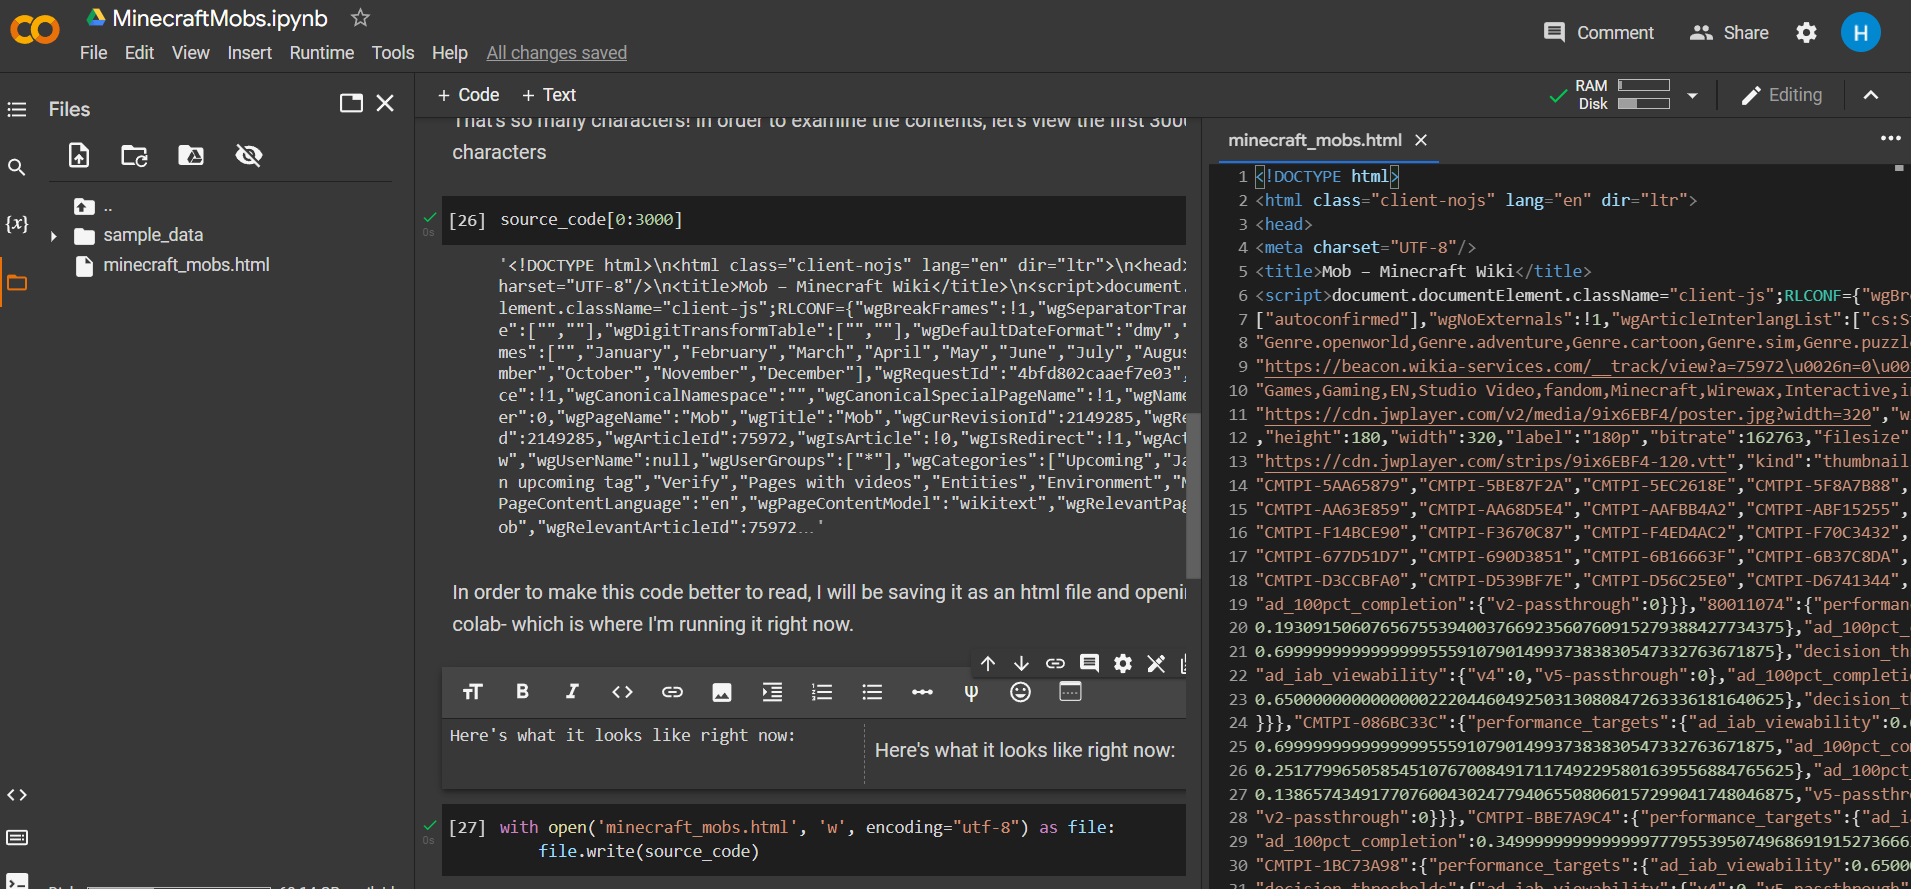

## Step 2: Extracting information from the page using the "BeautifulSoup" library

Installation and importing the library:

In [9]:
!pip install beautifulsoup4 --quiet

In [10]:
from bs4 import BeautifulSoup

Reading the contents of "minecraft_mobs.html" and creating an object of BeautifulSoup class for parsing it:

In [11]:
with open("minecraft_mobs.html", "r") as file_source:
  source_code_html= file_source.read()

In [12]:
source_code_html[:3000]

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Mob – Minecraft Wiki</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"6ab332c53c77cfc6","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Mob","wgTitle":"Mob","wgCurRevisionId":2149285,"wgRevisionId":2149285,"wgArticleId":75972,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Upcoming","Java Edition upcoming tag","Verify","Pages with videos","Entities","Environment","Mobs"],"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgRelevantPageName":"Mob","wgRelevantArticleId":7597

Getting the code into a BeautifulSoup object in order to perform parsing.

In [13]:
parse_doc=BeautifulSoup(source_code_html,"html.parser")

In [14]:
type(parse_doc)
# parse_doc is an object of BeautifulSoup class

bs4.BeautifulSoup

Viewing the title of the page.

In [15]:
parse_doc.title

<title>Mob – Minecraft Wiki</title>

Visual representation of the parsed URL Source code:

In [16]:
print(parse_doc.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Mob – Minecraft Wiki
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"6ab332c53c77cfc6","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Mob","wgTitle":"Mob","wgCurRevisionId":2149285,"wgRevisionId":2149285,"wgArticleId":75972,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Upcoming","Java Edition upcoming tag","Verify","Pages with videos","Entities","Environment","Mobs"],"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgRelevantPageName":"Mob","wgRelevantArt

Viewing the text of the page:

In [17]:
page_text=parse_doc.get_text()

page_text contains the text contained in the web page.
Let's view it's properties:

In [19]:
type(page_text)

str

In [20]:
len(page_text)

113905

## Step 3: Creating a csv file containing the extracted information